<a href="https://colab.research.google.com/github/simsia99/keras_deeplearning/blob/main/deep2-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [10]:
model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [11]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype("float32")/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype("float32")/255

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2607 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1067 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0693 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0525 - accuracy: 0.9838
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0383 - accuracy: 0.9888


In [13]:
test_digits=test_images[0:10]
predictions=model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 64ms/step


array([2.4608786e-07, 7.5999598e-09, 3.5347515e-05, 6.4452807e-04,
       8.6713262e-11, 1.2063684e-07, 6.0115857e-11, 9.9929911e-01,
       1.8316384e-06, 1.8837827e-05], dtype=float32)

In [14]:
predictions[0].argmax()
predictions[0][7]
test_labels[0]

7

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9778
테스트 정확도: 0.9778000116348267


In [16]:
import numpy as np
x=np.array(12)
x

array(12)

In [17]:
x.ndim

0

In [18]:
x=np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [19]:
x.ndim

1

In [20]:
x=np.array([[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]])
x.ndim

2

**2.2.4   랭크-3 텐서와 더 높은 랭크의 텐서**

In [21]:
x=np.array([[[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]],
            [[5,78,2,34,0],
            [6,79,3,35,1],
            [7,80,4,36,2]],
            [[5,78,2,34,0],
             [6,78,2,34,1],
             [7,80,4,36,2]]])
x.ndim

3

**2.2.5 핵심속성**

In [22]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

In [23]:
train_images.ndim

3

In [24]:
train_images.shape

(60000, 28, 28)

In [25]:
train_images.dtype

dtype('uint8')

↑8비트 정수형 랭크-3 텐서
28x28 크기의 정수 행렬 6만개가 있는 배열
행렬의 각 원소는 0에서 255사이의 값

↓랭크-3텐서에서 다섯번째 샘플을 맷플롯립 라이브러리를 사용한다.

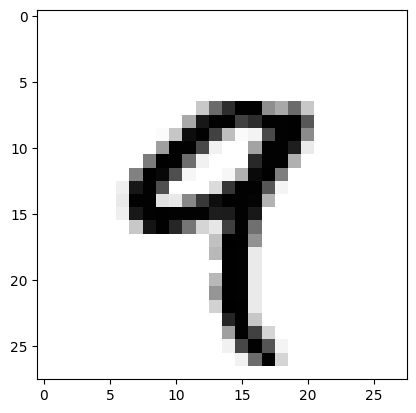

In [26]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [27]:
train_labels[4]

9

**2.2.6 넘파이로 텐서 조작하기**

11번째에서 101번째까지 숫자를 선택하여 (90,28,28)크기의 배열 만들기

In [28]:
my_slice=train_images[10:100]
my_slice.shape

(90, 28, 28)

각 배열의 축을 따라 슬랑ㅣ싱의 시작 인덱스와 마지막 인덱스를 지정

In [29]:
my_slice=train_images[10:100, : , :]
my_slice.shape

(90, 28, 28)

In [30]:
my_slice=train_images[10:100, 0:20, 0:28]
my_slice.shape

(90, 20, 28)

In [31]:
my_slice = train_images

이미지의 오른쪽 아래 14x14 픽셀을 선택

In [32]:
my_slice = train_images[:, 14:,14:]

음수 인덱스 사용
현대 축의 끝에서 상대적 위치 나타냄
14x14 픽셀 조각을 이미지에서 잘라냄

In [33]:
my_slice = train_images[:, 7:-7, 7:-7]

**2.2.7 배치데이터**

In [34]:
batch = train_images[:128]

In [35]:
batch = train_images[128:256]

In [36]:
n=3
batch=train_images[128*n:128*(n+1)]

2.3

In [38]:
keras.layers.Dense(512, activation="relu")

In [40]:
def native_relu(x):
  assert len(x.shape) == 2
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j]=max(x[i,j],0)
  return x

In [41]:
def native_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j]+=y[i,j]
  return x

In [46]:
import numpy as np
import time

x=np.random.random((20,100))
y=np.random.random((20,100))

t0=time.time()
for _ in range(1000):
 z = x + y
 z=np.maximum(z, 0.)
print("걸린시간 : {0:.2f} s".format(time.time()-10))

걸린시간 : 1684864340.22 s


In [51]:
t0=time.time()
for _ in range(1000):
 z = native_add(x, y) #책 오류 수정
 z = native_relu(z)
print("걸린시간 : {0:.2f} s".format(time.time()-10))

걸린시간 : 1684864509.39 s


2.3.2

In [52]:
def native_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j]+= y[j]
  return x

In [53]:
import numpy as np
x=np.random.random((64,3,32,10))
y=np.random.random((32,10))
z=np.maximum(x,y)

2.3.3 텐서 곱셈

In [54]:
x=np.random.random((32,))
y=np.random.random((32,))
z=np.dot(x,y)

2개의 벡터 x와 y의 점곱

In [56]:
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z=0.
  for i in range(x.shape[0]):
    z+=x[i]*y[i]
  return z

In [61]:
# from tensorflow.python.ops.math_ops import zeta_eager_fallback
def naive_vector_dot(x, y):
  assert len(x.shape) == 2 #넘파이행렬
  assert len(y.shape) == 1 #넘파이 벡터
  assert x.shape[0] == y.shape[0] #x의 두번째 차원이 y의 첫번째 차원과 같아야한다.
  z=np.zeros(x.shape[0]) #x의 행과 같은 크기의 0이 채워진 벡터
  for i in range(x.shape[0]):
    for j in range(x.shape[i]):
       z[i]+=x[i,j]*y[j]
  return z

dot(x,y)와 dot(y,x)는 다르다

In [66]:
def naive_matrix_vector_dot(x, y):
   z=np.zeros(x.shape[0])
   for i in range(x.shape[0]):
    z[i]=naive_vector_dot(x[i, :], y)
   return z

In [63]:
def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]
  z=np.zeros((x.shape[0], y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x=x[i,:]
      colum_y=y[:, j]
      z[i, j]=naive_vector_dot(row_x, column_y)
  return z
  #x와 y의 접곱으로 인해 행렬이 되는 구현 

2.3.4 텐서 크기 변환